# Name - Somen Das

## Prediction using Logistic Regression

## Task - To predict the possibility of a passenger to survive from titanic sinking 
##---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------##

## 1. Importing Library

For our task we will use pandas, seaborn, matplotlib, sklearn

In [1]:
import pandas as pd
import pandas_profiling
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve    

## 2. Data Wranggling
In this section we will remove the null values from the data.

In [2]:
df=pd.read_csv('titanic.csv')

<AxesSubplot:>

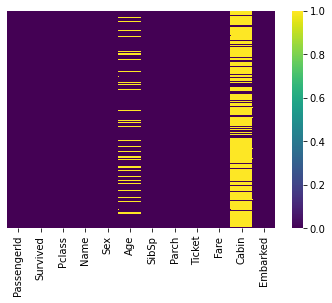

In [3]:
sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False)

### Note: From the heat map we can see the null values are present on the age and cabin columns.

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Note: On the age column we got 177 missing values, 687 on cabin column and 2 on Embarked column.

c:\users\amit\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

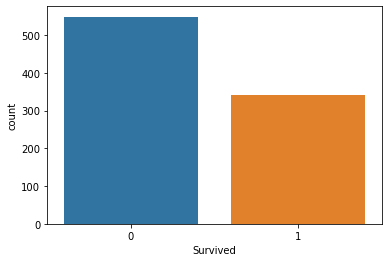

In [5]:
sns.countplot(df.Survived, data=df)

### Note: 0 - Not survived , 1 - Survived

c:\users\amit\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

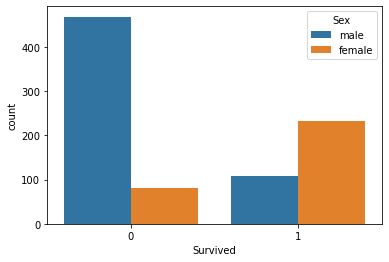

In [6]:
sns.countplot(df.Survived,hue=df.Sex)

### Note: from this plot we can see that survival of females are greater than males.

c:\users\amit\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

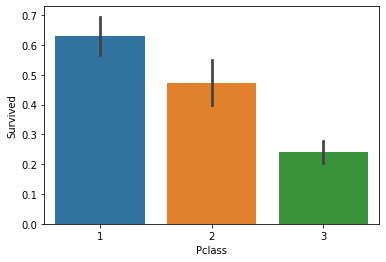

In [7]:
sns.barplot(df.Pclass,df.Survived)

### Note: Number of people survived from the first class is greater than other classes.

c:\users\amit\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

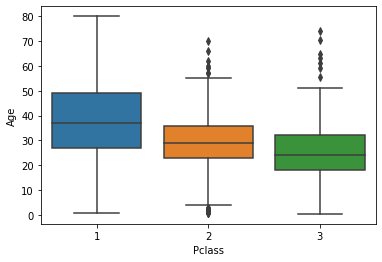

In [8]:
#plt.figure(figsize=(12,8))
sns.boxplot(df.Pclass,df.Age)

### Note: average age of people belong to first class is between 35 and 40

In [9]:
def impute_age(cols):  # impute function
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        return int(df[df['Pclass']==Pclass]['Age'].mean())
    else:
        return Age
    
    
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1) # replacing missing values by mean of age according to class    

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df.drop('Cabin',inplace=True,axis=1)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

c:\users\amit\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

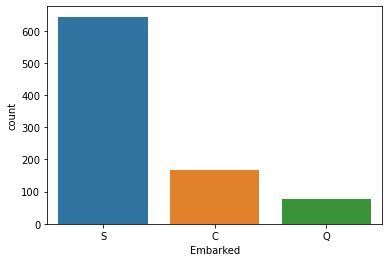

In [12]:
sns.countplot(df.Embarked)

### Note: from this plot we can see that most of the people embarked from Southhampton(S).

In [13]:
most_common_value='S'

for data in df:
    df.Embarked=df.Embarked.fillna(most_common_value) # replacing the missing values by S.

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
Sex=pd.get_dummies(df.Sex,drop_first=True)
Embark=pd.get_dummies(df.Embarked,drop_first=True)
Pclass=pd.get_dummies(df.Pclass,drop_first=True)

In [16]:
df.drop(['PassengerId','Name','Embarked','Sex','Ticket','Pclass'],axis=1,inplace=True)
df.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [17]:
df=pd.concat([df,Sex,Embark,Pclass],axis=1)
df.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


## 3. Preparing data for the model

In [18]:
x=df.drop('Survived',axis=1)
y=df.Survived

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)

## 4. Training the Model

In [20]:
model=LogisticRegression(random_state=50)
model.fit(x_train,y_train)
print('model trained')

model trained


c:\users\amit\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:760: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 5. Testing the model

In [21]:
prediction=model.predict(x_test)

In [26]:
target_names=['Not survived','Survived']

df=pd.DataFrame({'actual value':y_test,'predicted value':prediction})
df['label']=df['predicted value'].replace(dict(enumerate(target_names)))
df.head()

,actual value,predicted value,label
558,1,1,Survived
547,1,0,Not survived
494,0,0,Not survived
679,1,1,Survived
7,0,0,Not survived


## 6. Checking the accuracy

In [23]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       162
           1       0.80      0.68      0.73       106

    accuracy                           0.81       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.81      0.81      0.80       268



In [24]:
confusion_matrix(y_test,prediction)

array([[144,  18],
       [ 34,  72]], dtype=int64)

## 7. Visualizing the model

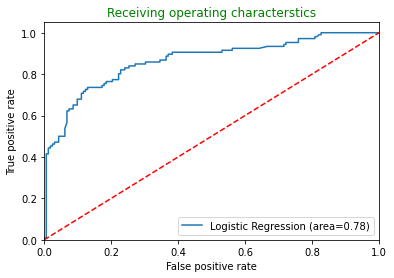

In [29]:
roc=roc_auc_score(y_test,model.predict(x_test))

fpr,tpr,thresholds=roc_curve(y_test,model.predict_proba(x_test)[:,1])

plt.plot(fpr,tpr,label='Logistic Regression (area=%0.2f)'%roc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])


plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title('Receiving operating characterstics',color='green')
plt.legend(loc='lower right')
plt.show()

# for more visit www.somenplus.blogspot.com